# Aldrich HW 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.optimize import minimize
#from scipy.integrate import odeint
#from scipy.optimize import fsolve

# Part A

Using your Forward Euler method, simulate the solution to the normalized SIS model discussed
in class (Week 3) using β = 3 and γ = 2, and with (s0, i0) = (0.99, 0.01). Create three plots
ranging from t = 0 to t = 25. On the first, simulate using a step size ∆t = 2. On the second,
use ∆t = 1. On the third, use ∆t = 1
2 . In each plot, show only your solution’s I(t) in a red
solid line, labeled as “Forward Euler”, and then also plot the analytical solution from class in a
black dashed line, labeled as “Analytical.” Please also set the y-axis range to [0, 0.5].

In [67]:
# forward euler 

def SIS(s0, i0, beta, gamma,  t_final, dt):
    
    T = np.linspace(0, t_final, 500)
    s = np.zeros(len(T))
    little_i = np.zeros(len(T))
    
    s[0] = s0
    little_i[0] = i0
    
    
    for i in range(len(T)):
        if i == 0:
            s[i] = s0
            little_i[i] = i0
        
        else: 
            # old SIR
            # S[i] = S[i-1] + dt*(- beta*S[i-1]*I[i-1] / N) 
            # I[i] = I[i-1] + dt*((beta*S[i-1]*I[i-1] / N) - gamma*I[i-1])
            # R[i] = R[i-1] + dt*(gamma*I[i-1])
            
            # new SIS
            s[i] = s[i-1] + dt*( - beta*s[i-1]*little_i[i-1]  + gamma*little_i[i-1])
            little_i[i] = little_i[i-1] + dt*( beta*s[i-1]*little_i[i-1] - gamma*little_i[i-1] ) 
    
            
    return s, little_i, T

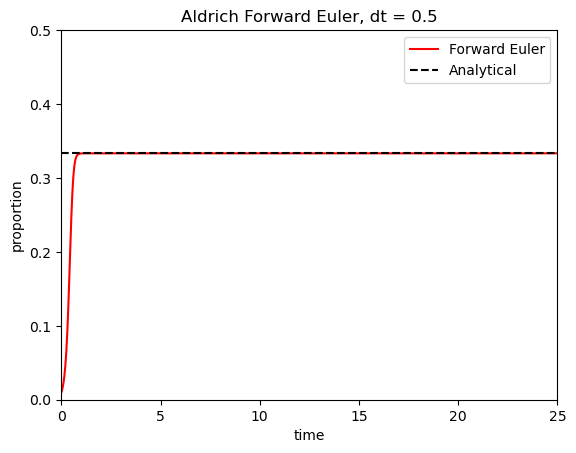

In [68]:
beta = 3
gamma = 2
R0 = beta / gamma 
max_time = 25 # days 
dt = 0.5


i_eq = 1 - 1 / R0 # analytical solution from class

# initial conditions
s0 = 0.99
i0 = 0.01

output = SIS(s0, i0, beta, gamma, max_time, dt)

fig,ax = plt.subplots()

# plot Euler solution
#ax.plot(output[2],output[0], c='blue', label='s')
ax.plot(output[2],output[1], c='red', label='Forward Euler')

# plot analytical solution
plt.axhline(y=i_eq, color='black', linestyle='--', label='Analytical')
ax.legend(loc = 'upper right')
ax.set_xlim([0, max_time])
ax.set_ylim( [0, 0.5])
ax.set_xlabel('time')
ax.set_ylabel('proportion')
plt.title(f'Aldrich Forward Euler, dt = {dt}')


plt.savefig(f'Aldrich_Forward_Euler_dt={dt}.png') 

# Part B - how does step size effect the solution? 

# Part C 

In [69]:

def error(s0, i0, beta, gamma,  t_final, dt):
    
    output = SIS(s0, i0, beta, gamma, t_final, dt)
    
    # set euler_i to the last element in the forward euler i(t) array
    i_values = output[1]
    euler_i = i_values[-1]
    
    R0 = beta / gamma 
    analytical_i = 1 - 1 / R0
    
    E = t_final*np.abs(euler_i - analytical_i) 
    
    return E 


# Part D

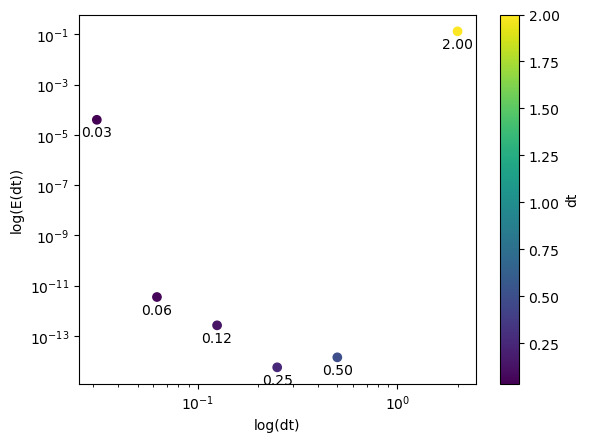

<Figure size 640x480 with 0 Axes>

In [70]:
dt_values = [2, 1, 0.5, 0.25, 1/8, 1/16, 1/32]

fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log(dt)')
ax.set_ylabel('log(E(dt))')

E_values= []
for dt in dt_values: 
    
    E = error(s0, i0, beta, gamma, max_time, dt)
    E_values.append(E)
    

sc = ax.scatter(dt_values, E_values, c=dt_values, cmap='viridis', label='dt values')
plt.colorbar(sc, label='dt')


for i in range(len(dt_values)):
    ax.annotate(f'{dt_values[i]:.2f}', (dt_values[i], E_values[i]), textcoords="offset points", xytext=(0,-12), ha='center')


plt.show()
plt.savefig(f'Aldrich_effect_of_stepsize.png') 

# Question 2

# Part A

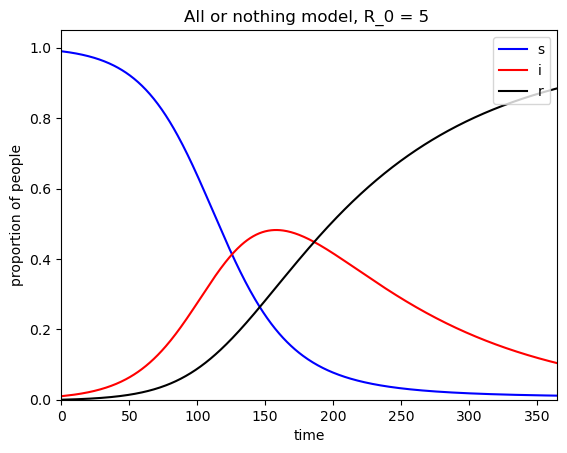

In [25]:
# All or nothing 

gamma = 1 / 14 # gamma = 1 / time of infection
R0 = 5
beta = R0*gamma 

#variant_R0s = [3, 4, 5]

#variant_betas = []
#for R0 in variant_R0s: 
#    beta = R0 * gamma
#    variant_betas.append(beta)
    
max_time = 365 # days 
dt = 0.1

# initial conditions 
# N = 300000
s0 = 0.99
i0 = 0.01
r0 = 0
v0 = 0.5
VE = 0.8

output = all_or_nothing(s0, i0, r0, beta, gamma, v0, VE, max_time, dt)

fig,ax = plt.subplots()
ax.plot(output[5], output[0] , c='blue', label=f's')
ax.plot(output[5], output[1], c='red', label='i')
ax.plot(output[5], output[2], c='black', label='r')

ax.legend(loc = 'upper right')
ax.set_xlim([0, max_time])
ax.set_ylim( [0, 1.05])
ax.set_xlabel('time')
ax.set_ylabel('proportion of people')
plt.title(f'All or nothing model, R_0 = {R0} ')
plt.show()

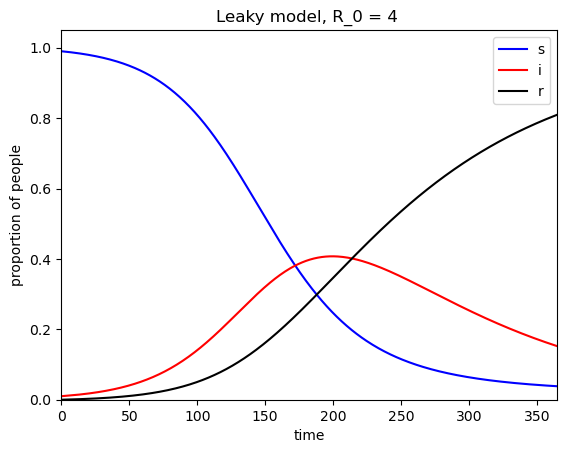

In [16]:
# leaky 

gamma = 1 / 14 # gamma = 1 / time of infection
R0 = 4
beta = R0*gamma 

#variant_R0s = [3, 4, 5]

#variant_betas = []
#for R0 in variant_R0s: 
#    beta = R0 * gamma
#    variant_betas.append(beta)
    
max_time = 365 # days 
dt = 0.1

# initial conditions 
# N = 300000
s0 = 0.99
i0 = 0.01
r0 = 0
v0 = 0.5
VE = 0.8

output = leaky(s0, i0, r0, v0, beta, gamma, VE, max_time, dt)

fig,ax = plt.subplots()
t = np.linspace(0, max_time, 500)
ax.plot(t, output[0] , c='blue', label=f's')
ax.plot(t, output[1], c='red', label='i')
ax.plot(t, output[2], c='black', label='r')



ax.legend(loc = 'upper right')
ax.set_xlim(0, max_time)
ax.set_ylim( 0, 1.05)
ax.set_xlabel('time')
ax.set_ylabel('proportion of people')
plt.title(f'Leaky model, R_0 = {R0} ')
plt.show()

# how many individuals infected at peak endemic?

In [26]:
max_value = np.max(output[1])
N = 300000
max_individuals = N * max_value

print(max_individuals.round(0))

# all or nothing 
# R0 3 = 91402
# R0 4 = 122219
# R0 5 = 144643

# leaky 
# R0 3 = 91402
# R0 4 =  122219
# R0 5 = 144643

144643.0


# what percent of the population actually needs to be vaccinated for each variant? 

/tmp/ipykernel_378/1259747159.py:13: RuntimeWarning: divide by zero encountered in divide
  ideal_v = (1 - (1/R_0))*(1/VE)


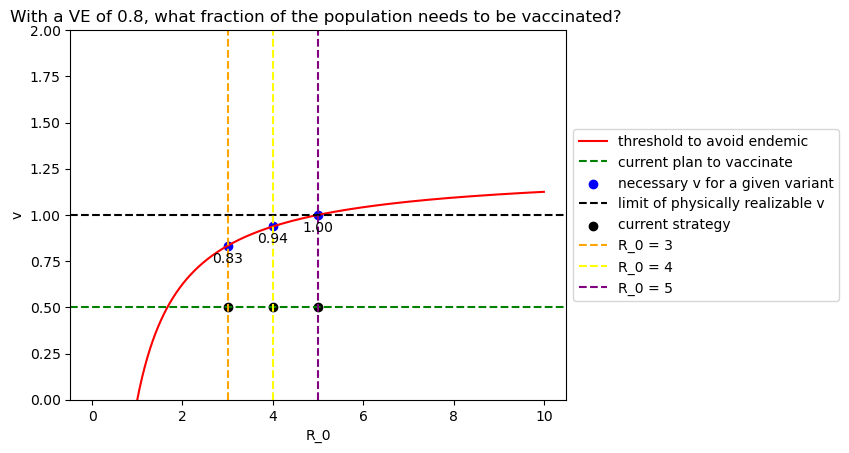

In [83]:
fig,ax = plt.subplots()

VE = 0.8
variant_R0s = [3, 4, 5]
v_values = [0.5, 0.5, 0.5] # regardless of the variant, there are only enough vaccines for half the population 

ax.set_xlabel('R_0')
ax.set_ylabel('v')
ax.set_ylim(0, 1) # proportions for v
R_0 =  np.linspace(0, 10, 500)

# plot the endemic threshold 
ideal_v = (1 - (1/R_0))*(1/VE)
ax.plot(R_0, ideal_v, c='red', label='threshold to avoid endemic')
ax.set_ylim(0, 2)
plt.axhline(y=(0.5), color='green', linestyle='--', label='current plan to vaccinate')

# what fraction of population would need to be vax at a given variant's R0 value? 

necessary_v_at_given_R0 = []
for i in variant_R0s: # want this to plug in [3, 4, 5] for i 
    v = (1 - (1/i))*(1/VE) 
    necessary_v_at_given_R0.append(v)

ax.scatter(variant_R0s, necessary_v_at_given_R0, c = 'blue', label ='necessary v for a given variant')
for i in range(len(variant_R0s)):
    ax.annotate(f'{necessary_v_at_given_R0[i]:.2f}', (variant_R0s[i], necessary_v_at_given_R0[i]), textcoords="offset points", xytext=(0,-12), ha='center')

    
plt.axhline(y=(1), color='black', linestyle='--', label='limit of physically realizable v')

# compare this with the proposed approach to vax 50% with VE = 0.8
ax.scatter(variant_R0s, v_values, c='black', label='current strategy')
#for i in range(len(variant_R0s)):
#    ax.annotate(f'{variant_R0s[i]}', (variant_R0s[i], v_values[i]), textcoords="offset points", xytext=(0,-12), ha='center')

plt.axvline(x=(3), color='orange', linestyle='--', label='R_0 = 3')
plt.axvline(x=(4), color='yellow', linestyle='--', label='R_0 = 4')
plt.axvline(x=(5), color='purple', linestyle='--', label='R_0 = 5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(f'With a VE of 0.8, what fraction of the population needs to be vaccinated? ') 

plt.show()

# How much better would the vaccine need to be if we only plan to make enough to give to half the population? 

/tmp/ipykernel_378/2868663382.py:13: RuntimeWarning: divide by zero encountered in divide
  ideal_VE = (1 - (1/R_0))*(1/v)


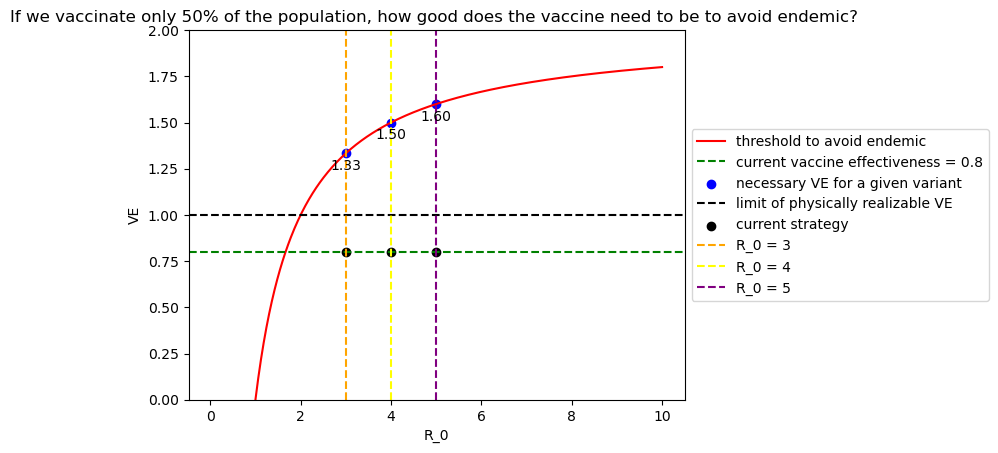

In [86]:
fig,ax = plt.subplots()

variant_R0s = [3, 4, 5]
VE_values = [0.8, 0.8, 0.8] # regardless of the variant, the current VE is 0.8
v = 0.5

ax.set_xlabel('R_0')
ax.set_ylabel('VE')
ax.set_ylim(0, 1.25) # VE ranges from 0 to 1
R_0 =  np.linspace(0, 10, 500)

# plot the endemic threshold 
ideal_VE = (1 - (1/R_0))*(1/v)
ax.plot(R_0, ideal_VE, c='red', label='threshold to avoid endemic')
ax.set_ylim(0, 2)
plt.axhline(y=(0.8), color='green', linestyle='--', label='current vaccine effectiveness = 0.8')


# what  would need the VE of the vax need to be at a given variant's R0 value to avoid endemic? 

necessary_VE_at_given_R0 = []
for i in variant_R0s: # want this to plug in [3, 4, 5] for i 
    VE = (1 - (1/i))*(1/v) 
    necessary_VE_at_given_R0.append(VE)
  
    

ax.scatter(variant_R0s, necessary_VE_at_given_R0, c = 'blue', label ='necessary VE for a given variant')
for i in range(len(variant_R0s)):
    ax.annotate(f'{necessary_VE_at_given_R0[i]:.2f}', (variant_R0s[i], necessary_VE_at_given_R0[i]), textcoords="offset points", xytext=(0,-12), ha='center')
    
plt.axhline(y=(1), color='black', linestyle='--', label='limit of physically realizable VE')


# compare this with the proposed approach to vax 50% and VE 0.8
ax.scatter(variant_R0s, VE_values, c='black', label='current strategy')
#for i in range(len(variant_R0s)):
#    ax.annotate(f'{variant_R0s[i]}', (variant_R0s[i], VE_values[i]), textcoords="offset points", xytext=(0,-12), ha='center')

plt.axvline(x=(3), color='orange', linestyle='--', label='R_0 = 3')
plt.axvline(x=(4), color='yellow', linestyle='--', label='R_0 = 4')
plt.axvline(x=(5), color='purple', linestyle='--', label='R_0 = 5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



plt.title(f'If we vaccinate only 50% of the population, how good does the vaccine need to be to avoid endemic? ') 

plt.show()

# Improving the vaccine when we only want to vaccinate half the pop if not a physically realistic solution...Can we optimize instead? If we improve VE just a little bit and improve the fraction vaccinated just a little bit, how can we avoid endemic? What fraction of the population needs to be effectively vaccinated (v*VE)? 


/tmp/ipykernel_378/3548248976.py:12: RuntimeWarning: divide by zero encountered in divide
  ideal_vVE = 1 - (1/R_0)


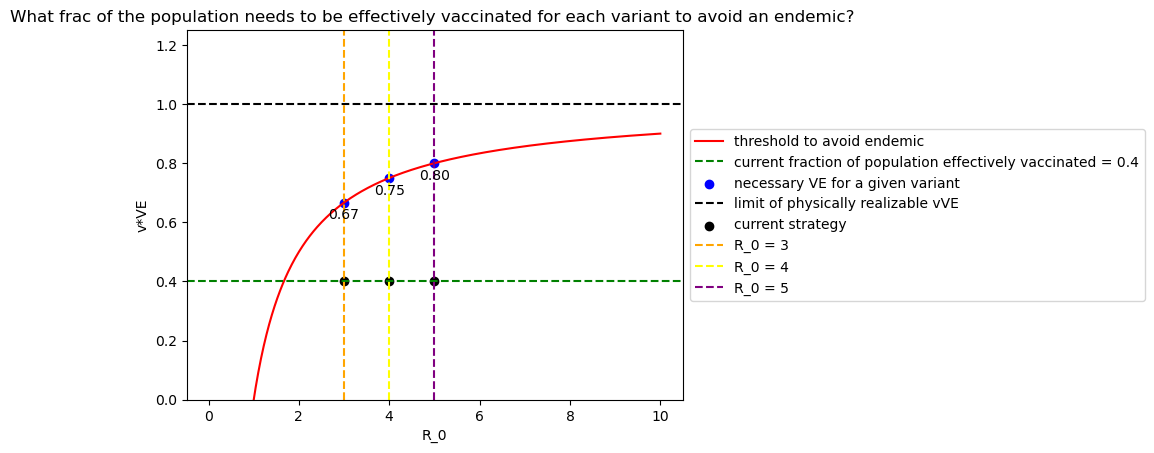

In [87]:
fig,ax = plt.subplots()


variant_R0s = [3, 4, 5]
VE = 0.8 
v = 0.5
vVE_values = [v*VE, v*VE, v*VE] # current frac of pop effectively vax is the same for all variants

R_0 =  np.linspace(0, 10, 500)

# plot the endemic threshold 
ideal_vVE = 1 - (1/R_0)
ax.plot(R_0, ideal_vVE, c='red', label='threshold to avoid endemic')
ax.set_ylim(0, 2)
plt.axhline(y=(0.8*0.5), color='green', linestyle='--', label=f'current fraction of population effectively vaccinated = {v*VE}')


# what  would need the v*VE of the vax need to be at a given variant's R0 value to avoid endemic? 

necessary_vVE_at_given_R0 = []
for i in variant_R0s: 
    vVE = (1 - (1/i))
    necessary_vVE_at_given_R0.append(vVE)
  
    

ax.scatter(variant_R0s, necessary_vVE_at_given_R0, c = 'blue', label ='necessary VE for a given variant')
for i in range(len(variant_R0s)):
    ax.annotate(f'{necessary_vVE_at_given_R0[i]:.2f}', (variant_R0s[i], necessary_vVE_at_given_R0[i]), textcoords="offset points", xytext=(0,-12), ha='center')
    
plt.axhline(y=(1), color='black', linestyle='--', label='limit of physically realizable vVE')


# compare this with the proposed approach to vax 50% and VE 0.8
ax.scatter(variant_R0s, vVE_values, c='black', label='current strategy')
#for i in range(len(variant_R0s)):
#    ax.annotate(f'{variant_R0s[i]}', (variant_R0s[i], vVE_values[i]), textcoords="offset points", xytext=(0,-12), ha='center')

plt.axvline(x=(3), color='orange', linestyle='--', label='R_0 = 3')
plt.axvline(x=(4), color='yellow', linestyle='--', label='R_0 = 4')
plt.axvline(x=(5), color='purple', linestyle='--', label='R_0 = 5')


ax.set_xlabel('R_0')
ax.set_ylabel('v*VE')
ax.set_ylim(0, 1.25) # v*VE ranges from 0 to 1

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(f'What frac of the population needs to be effectively vaccinated for each variant to avoid an endemic? ') 

plt.show()

To be effective against the highest R_0 variant, vVE needs to be at least 0.8. So what is the least we can improve v and VE to reach this goal? 

Optimal values:
x = 0.31818181818181823
y = 0.17777777777777773


/tmp/ipykernel_378/3847504268.py:34: RuntimeWarning: divide by zero encountered in divide
  ideal_vVE = 1 - (1/R_0)


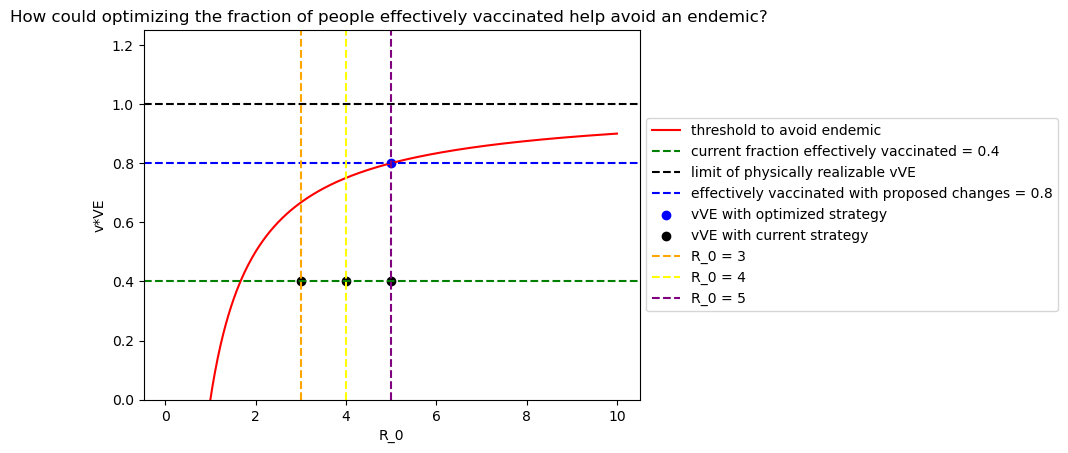

In [89]:
v = 0.5
VE = 0.8

# restrict v+x and VE+y to 1 
x_range = np.linspace(0, 1-v, 100)
y_range = np.linspace(0, 1- VE, 100)


def optimize(v=0.5, VE=0.8, x=x_range, y=y_range):
    # x is the perturbation for v, y is the perturbation for y
    vVE = (v + x)*(VE + y) 
    
    vVE_cutoff = 0.8 # for R_0 = 5 (most rigorous cutoff)
    
    return vVE_cutoff - vVE 

output = np.argwhere(np.isclose(optimize(v, VE, x_range[:, None], y_range), 0))


# Extract the corresponding values of x and y
x_opt = x_range[output[0][0]]
y_opt = y_range[output[0][1]]

print("Optimal values:")
print("x =", x_opt)
print("y =", y_opt)

# show the difference between v, v+x, VE, and VE + y 
fig,ax = plt.subplots()

R_0 =  np.linspace(0, 10, 500)

# plot the endemic threshold 
ideal_vVE = 1 - (1/R_0)
ax.plot(R_0, ideal_vVE, c='red', label='threshold to avoid endemic')
ax.set_ylim(0, 2)
plt.axhline(y=(0.8*0.5), color='green', linestyle='--', label='current fraction effectively vaccinated = 0.4')
    
plt.axhline(y=(1), color='black', linestyle='--', label='limit of physically realizable vVE')


# plot vVE with the added perturbations
plt.axhline(y=((v+x_opt)*(VE+y_opt)), color='blue', linestyle='--', label=f'effectively vaccinated with proposed changes = {(v+x_opt)*(VE+y_opt)}')
ax.scatter(5, ((v+x_opt)*(VE+y_opt)), c='blue', label='vVE with optimized strategy')
#ax.annotate(f'R_0 = {variant_R0s[2]}, vVE = {((v+x_opt)*(VE+y_opt)):.2f}', (variant_R0s[2], ((v+x_opt)*(VE+y_opt))), textcoords="offset points", xytext=(0,-12), ha='center')

# compare this with the current approach to vax 50% and VE 0.8
ax.scatter(variant_R0s, vVE_values, c='black', label='vVE with current strategy')
#for i in range(len(variant_R0s)):
#    ax.annotate(f'{variant_R0s[i]}', (variant_R0s[i], vVE_values[i]), textcoords="offset points", xytext=(0,-12), ha='center')

plt.axvline(x=(3), color='orange', linestyle='--', label='R_0 = 3')
plt.axvline(x=(4), color='yellow', linestyle='--', label='R_0 = 4')
plt.axvline(x=(5), color='purple', linestyle='--', label='R_0 = 5')


ax.set_xlabel('R_0')
ax.set_ylabel('v*VE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(0, 1.25) # v*VE ranges from 0 to 1

plt.title(f'How could optimizing the fraction of people effectively vaccinated help avoid an endemic? ') 

plt.show()